In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import fmEphys as fme

Loading DLC 2.2.3...


In [3]:
hffm = fme.read_group_h5(r'C:\Users\dmartins\Documents\Dropbox\Research\Niell_lab\Data\Gaze_shift_data\Mouse\complete_dataset\hffm_021423_figupdate.h5')

In [4]:
list(hffm['session'].unique())

['020222_J577TT_control_Rig2',
 '020422_J577RT_control_Rig2',
 '062921_G6HCK1ALTRN_control_Rig2',
 '070921_J553RT_control_Rig2',
 '101521_J559NC_control_Rig2',
 '102621_J558NC_control_Rig2',
 '110321_J558LT_control_Rig2',
 '110421_J569LT_control_Rig2',
 '122021_J581RT_control_Rig2']

In [5]:
[x for x in hffm.columns.values if 'depth' in x]

['depth',
 'Rc_relative_depth',
 'Rc_ch_lfp_relative_depth',
 'Rc_depth_from_layer4',
 'Wn_depth_from_layer5']

In [9]:
def jitter(center, size):
    return np.ones(size)+np.random.uniform(center-0.1, center+0.1, size)

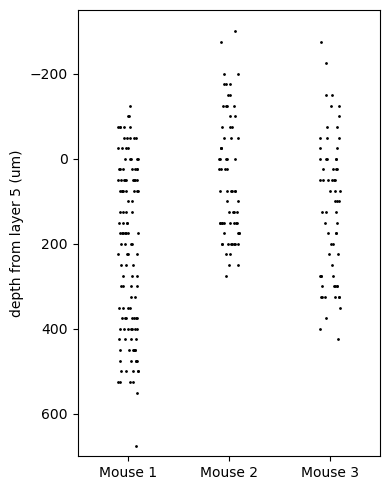

In [14]:
fig, ax = plt.subplots(1,1,figsize=(4,5))

m1_depths = hffm['Wn_depth_from_layer5'][hffm['session']=='070921_J553RT_control_Rig2'].copy().to_numpy()
m2_depths = hffm['Wn_depth_from_layer5'][hffm['session']=='110421_J569LT_control_Rig2'].copy().to_numpy()
m3_depths = hffm['Wn_depth_from_layer5'][hffm['session']=='101521_J559NC_control_Rig2'].copy().to_numpy()

ax.plot(jitter(0,len(m1_depths)), m1_depths, '.', ms=2, color='k')
ax.plot(jitter(1,len(m2_depths)), m2_depths, '.', ms=2, color='k')
ax.plot(jitter(2,len(m3_depths)), m3_depths, '.', ms=2, color='k')

ax.set_ylim([700, -350])
ax.set_xlim([.5,3.5])

ax.set_xticks([1,2,3], labels=['Mouse 1', 'Mouse 2', 'Mouse 3'])
ax.set_ylabel('depth from layer 5 (um)')

fig.tight_layout()
fig.savefig('depth_jitter.png')